In [ ]:
!pip install -q timm
!pip install -q torchview

In [ ]:
import timm
import torch
import torchvision
from torchview import draw_graph

In [ ]:
model = timm.create_model(
    'maxvit_tiny_tf_224.in1k',
    pretrained=True,
    num_classes=0,  
    no_jit=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/124M [00:00<?, ?B/s]

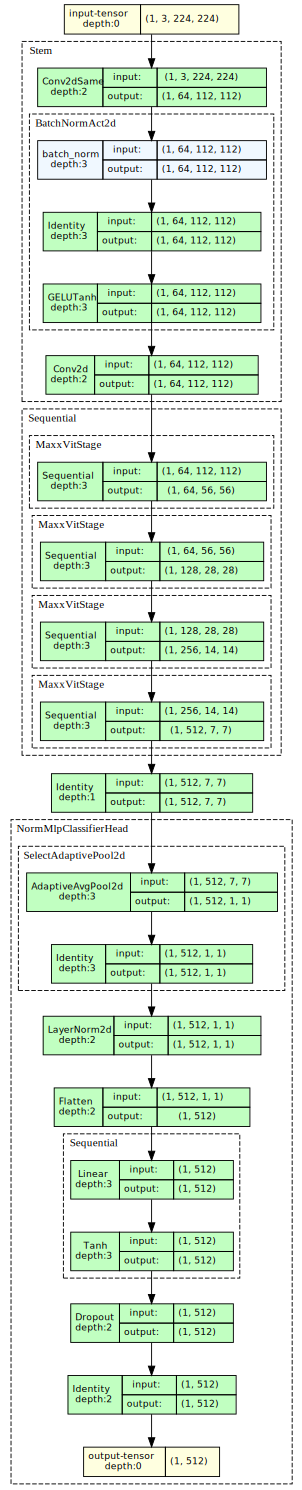

In [ ]:
model_graph = draw_graph(model, input_size=(1,3,224,224), expand_nested=True)
model_graph.visual_graph

In [ ]:
# import torch
import torch.nn as nn
import timm
from timm.models import SwinTransformer
class SwinTransformerTimm(nn.Module):
    r""" Swin Transformer
        A PyTorch impl of : `Swin Transformer: Hierarchical Vision Transformer using Shifted Windows`  -
          https://arxiv.org/pdf/2103.14030

    Args:
        model_name (str): Pretrained timm model name getting from https://huggingface.co/timm/swin_tiny_patch4_window7_224.ms_in1k. Default, swin_tiny_patch4_window7_224.ms_in1k.
        img_size (int | tuple(int)): Input image size. Default 224
        in_chans (int): Number of input image channels. Default: 3
        num_classes (int): Number of classes for classification head. Default: 14
        num_mlp_heads (int): Number of linear layers for each num_classes. Default 3
    """
    def __init__(self, img_size=224, patch_size=4, in_chans=3, num_classes=1000,
                 embed_dim=96, depths=[2, 2, 6, 2], num_heads=[3, 6, 12, 24],
                 window_size=7, mlp_ratio=4., qkv_bias=True, qk_scale=None,
                 drop_rate=0., attn_drop_rate=0., drop_path_rate=0.1,
                 norm_layer=nn.LayerNorm, ape=False, patch_norm=True,
                 use_checkpoint=False, **kwargs):
        super(SwinTransformerTimm,self).__init__()
        self.model=SwinTransformer( img_size = img_size,
                                    patch_size = patch_size,
                                    in_chans = in_chans,
                                    num_classes = 0,
                                    embed_dim = embed_dim,
                                    depths = depths,
                                    num_heads = num_heads,
                                    window_size = window_size,
                                    mlp_ratio = mlp_ratio,
                                    qkv_bias = qkv_bias,
                                    qk_scale = qk_scale,
                                    drop_rate = drop_rate,
                                    drop_path_rate = drop_path_rate,
                                    ape = ape,
                                    patch_norm = patch_norm,
                                    use_checkpoint = use_checkpoint,
                                    )

        self.num_classes = num_classes
        self.num_features = self.model.num_features

        self.heads = nn.ModuleList()
        self.heads2 = nn.ModuleList()
        self.heads3 = nn.ModuleList()
        self.heads4 = nn.ModuleList()
        self.relu = nn.ReLU()
        for _ in range(num_classes):
            self.heads.append(nn.Linear(self.num_features, 384))
            self.heads2.append(nn.Linear(384, 48))
            self.heads3.append(nn.Linear(48, 48))
            self.heads4.append(nn.Linear(48, 2))

    def forward(self,x):
        x=self.model(x)
        y = []
        for i in range(len(self.heads)):
            y.append(self.heads4[i](self.relu(self.heads3[i](self.relu(self.heads2[i](self.relu(self.heads[i](x))))))))
        return y

In [ ]:
model = SwinTransformerTimm(num_classes=14)

In [ ]:
import torch
import torch.nn.functional as F

example_input = torch.randn(2, 3, 224, 224)
example_input = example_input.to('cuda')
with torch.no_grad():
    output = model(example_input)

print(output)
print(F.softmax(output[0], dim=1))

[tensor([[-0.0383,  0.0620],
        [-0.0357,  0.0656]], device='cuda:0'), tensor([[ 0.1217, -0.0363],
        [ 0.1379, -0.0492]], device='cuda:0'), tensor([[ 0.0107, -0.1660],
        [-0.0046, -0.1560]], device='cuda:0'), tensor([[0.0275, 0.1051],
        [0.0310, 0.1148]], device='cuda:0'), tensor([[ 0.0897, -0.1513],
        [ 0.0932, -0.1360]], device='cuda:0'), tensor([[-0.0034,  0.0188],
        [-0.0066,  0.0167]], device='cuda:0'), tensor([[ 0.1330, -0.1274],
        [ 0.1305, -0.1311]], device='cuda:0'), tensor([[-0.1187, -0.0744],
        [-0.1141, -0.0718]], device='cuda:0'), tensor([[ 0.0284, -0.0474],
        [ 0.0216, -0.0372]], device='cuda:0'), tensor([[-0.0841,  0.1014],
        [-0.0920,  0.1049]], device='cuda:0'), tensor([[0.0113, 0.1217],
        [0.0082, 0.1418]], device='cuda:0'), tensor([[-0.1536, -0.0174],
        [-0.1374, -0.0251]], device='cuda:0'), tensor([[0.0037, 0.1168],
        [0.0088, 0.1190]], device='cuda:0'), tensor([[ 0.0464, -0.0158],
        

In [ ]:
model.eval()

SwinTransformerTimm(
  (model): SwinTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (layers): Sequential(
      (0): SwinTransformerStage(
        (downsample): Identity()
        (blocks): Sequential(
          (0): SwinTransformerBlock(
            (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
            (attn): WindowAttention(
              (qkv): Linear(in_features=96, out_features=288, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=96, out_features=96, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
              (softmax): Softmax(dim=-1)
            )
            (drop_path1): Identity()
            (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
            (mlp): Mlp(
              (fc1): Linear(in_features=96, out_features=384, bi

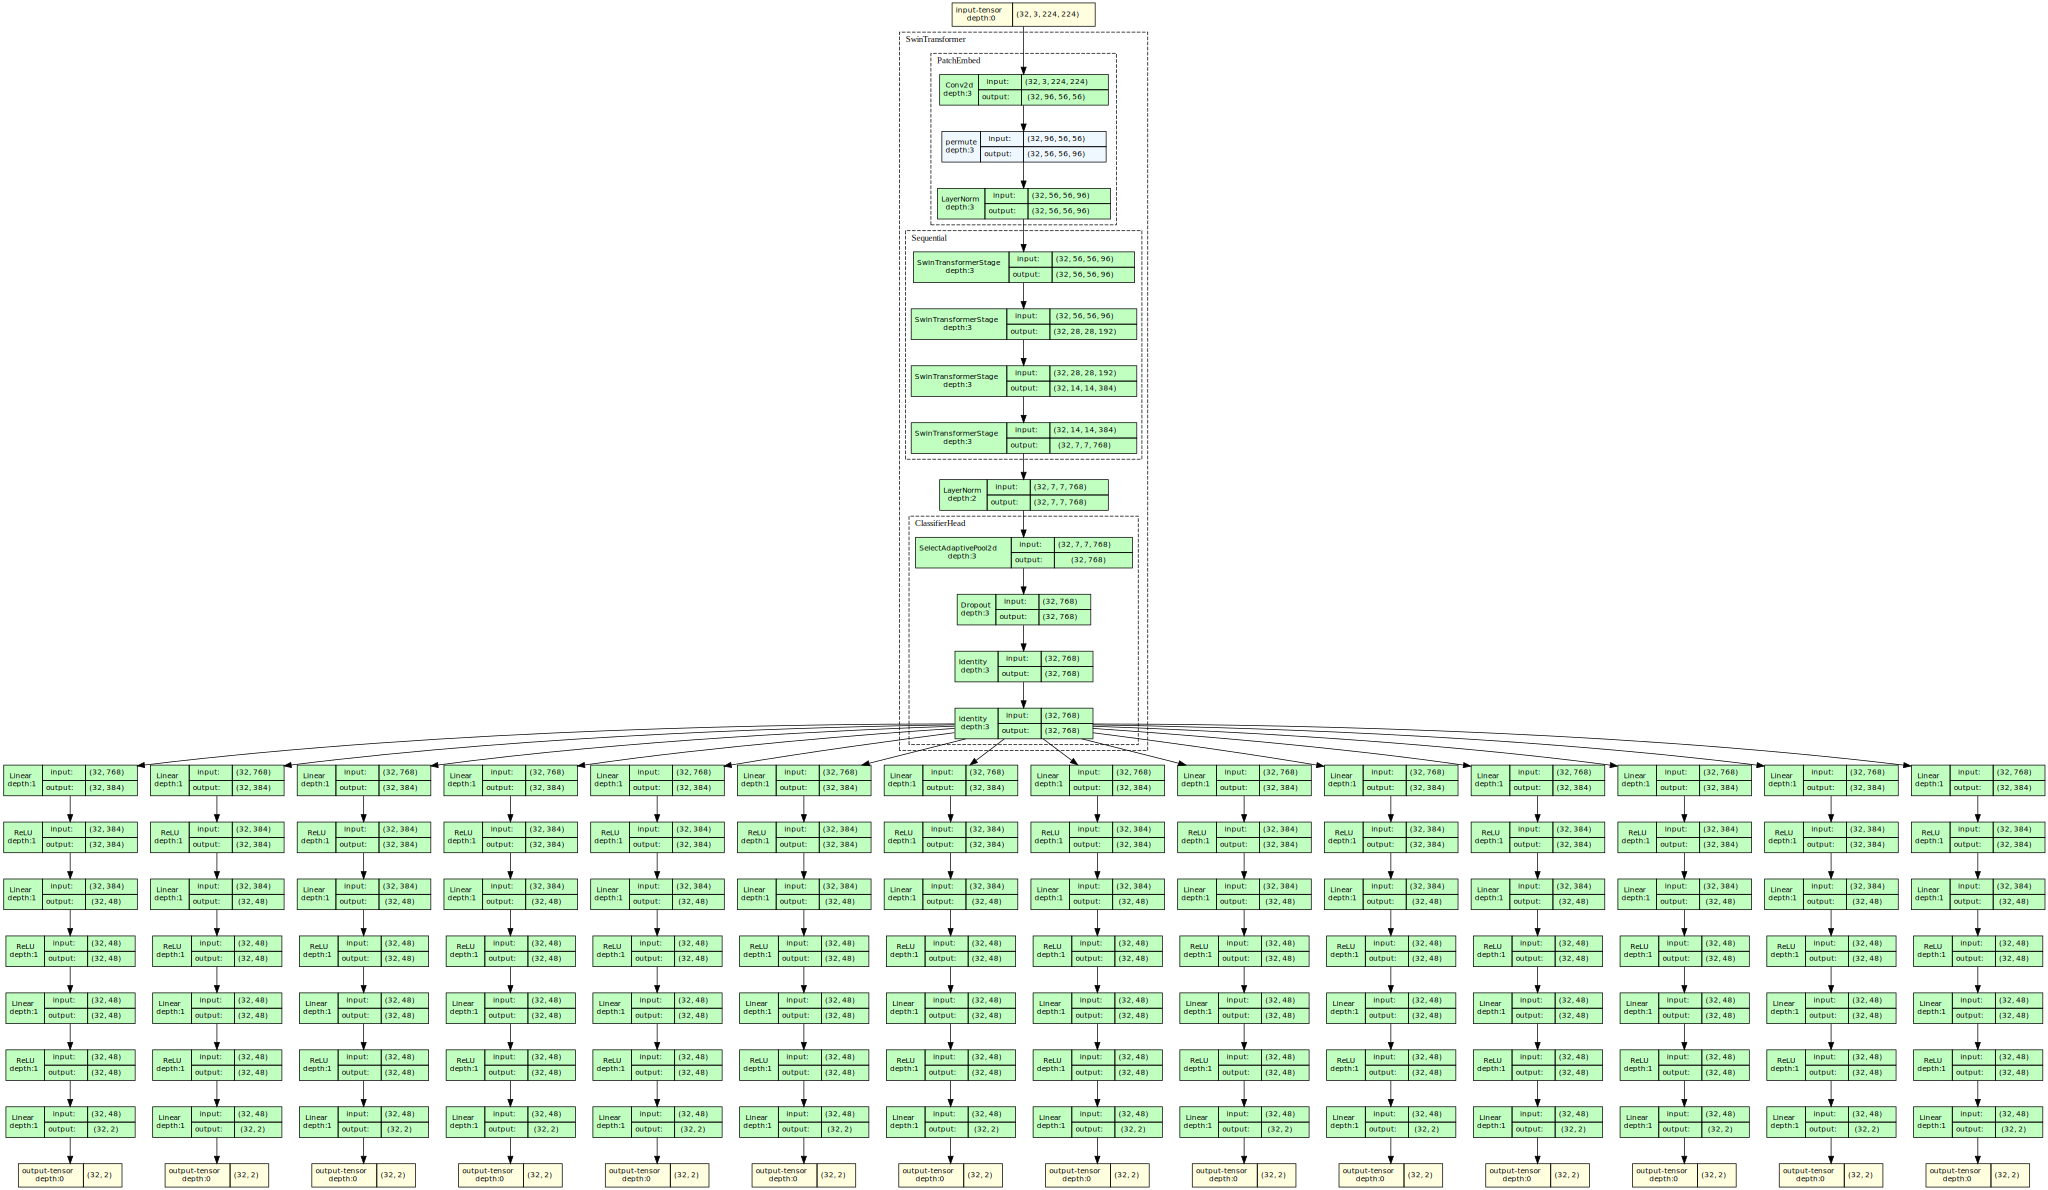

In [ ]:
model_graph = draw_graph(model, input_size=(32,3,224,224), expand_nested=True)
model_graph.visual_graph

In [ ]:
!kaggle datasets download emirhanyldz/chest-xray

Dataset URL: https://www.kaggle.com/datasets/emirhanyldz/chest-xray
License(s): CC0-1.0
100% 2.11G/2.11G [01:37<00:00, 26.6MB/s]
100% 2.11G/2.11G [01:37<00:00, 23.2MB/s]


In [ ]:
!unzip chest-xray.zip -d chest_xray/

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: chest_xray/images/00003122_017.png  
  inflating: chest_xray/images/00003124_000.png  
  inflating: chest_xray/images/00003129_000.png  
  inflating: chest_xray/images/00003129_001.png  
  inflating: chest_xray/images/00003129_004.png  
  inflating: chest_xray/images/00003129_009.png  
  inflating: chest_xray/images/00003129_011.png  
  inflating: chest_xray/images/00003135_000.png  
  inflating: chest_xray/images/00003140_007.png  
  inflating: chest_xray/images/00003159_001.png  
  inflating: chest_xray/images/00003169_001.png  
  inflating: chest_xray/images/00003177_002.png  
  inflating: chest_xray/images/00003186_004.png  
  inflating: chest_xray/images/00003186_005.png  
  inflating: chest_xray/images/00003190_018.png  
  inflating: chest_xray/images/00003191_001.png  
  inflating: chest_xray/images/00003198_002.png  
  inflating: chest_xray/images/00003198_005.png  
  inflating: chest_xray/images/00003198_009.png  
  i

In [ ]:
import numpy as np
import os
import pandas as pd
import skimage
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class CustomNIHDataset(Dataset):
    def __init__(self, img_dir, csv_file, transform=None):
        self.img_dir = img_dir
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.pathologies = [
            "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration",
            "Mass", "Nodule", "Pneumonia", "Pneumothorax", "Consolidation",
            "Edema", "Emphysema", "Fibrosis", "Pleural_Thickening", "Hernia"
        ]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data.iloc[idx]["Image Index"])
        image = Image.open(img_name).convert("RGB")

        label = np.zeros(len(self.pathologies))

        for i, pathology in enumerate(self.pathologies):
            if pathology in self.data.iloc[idx]["Finding Labels"]:
                label[i] = 1.0

        if self.transform:
            image = self.transform(image)


        return image, torch.tensor(label).float()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import shutil
from sklearn.model_selection import train_test_split
import pandas as pd
from torch.utils.data import Subset

images_dir = '/content/chest_xray/images'
labels_file = '/content/chest_xray/labels.csv'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


dataset = CustomNIHDataset(img_dir=images_dir, csv_file=labels_file, transform=transform)

train_indices, test_indices = train_test_split(
    range(len(dataset)), test_size=0.1, random_state=42  
)

train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score

def train_epoch(model, train_loader, loss_fn, optimizer):
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    all_train_labels = []
    all_train_probs = []

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs, labels = inputs.to(device), labels.to(device)

        output = model(inputs) 
        output = torch.stack(output, dim=0) 
        output = output.permute(1, 0, 2)  

        loss = 0
        for i in range(14):
            loss += loss_fn(output[:, i, :], labels[:, i].long())

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        preds = output.argmax(dim=2)  
        train_correct += (preds == labels.long()).sum().item()
        train_total += labels.numel()

        all_train_labels.append(labels.long().cpu())
        all_train_probs.append(torch.softmax(output, dim=2)[:, :, 1].detach().cpu())

    all_train_labels = torch.cat(all_train_labels).numpy()
    all_train_probs = torch.cat(all_train_probs).numpy()
    train_auc = roc_auc_score(all_train_labels.ravel(), all_train_probs.ravel())

    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total

    return train_loss, train_accuracy, train_auc

def val_epoch(model, val_loader, loss_fn):
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    all_val_labels = []
    all_val_probs = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            output = model(inputs)
            output = torch.stack(output, dim=0)
            output = output.permute(1, 0, 2)

            loss = 0
            for i in range(14):
                loss += loss_fn(output[:, i, :], labels[:, i].long())

            val_loss += loss.item()

            preds = output.argmax(dim=2)
            val_correct += (preds == labels.long()).sum().item()
            val_total += labels.numel()

            all_val_labels.append(labels.long().cpu())
            all_val_probs.append(torch.softmax(output, dim=2)[:, :, 1].detach().cpu())


    all_val_labels = torch.cat(all_val_labels).numpy()
    all_val_probs = torch.cat(all_val_probs).numpy()
    val_auc = roc_auc_score(all_val_labels.ravel(), all_val_probs.ravel())

    val_loss /= len(val_loader)
    val_accuracy = val_correct / val_total

    return val_loss, val_accuracy, val_auc


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 5
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()


for epoch in range(num_epochs):
    train_loss, train_accuracy, train_auc = train_epoch(model, train_loader, criterion, optimizer)
    val_loss, val_accuracy, val_auc = val_epoch(model, test_loader, criterion)

    print(
        f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Train AUC: {train_auc:.4f}, "
        f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Val AUC: {val_auc:.4f}"
    )

print("Eğitim tamamlandı!")

Epoch 1/5, Train Loss: 2.5330, Train Accuracy: 0.9497, Train AUC: 0.7403, Val Loss: 2.5488, Val Accuracy: 0.9515, Val AUC: 0.7275
Epoch 2/5, Train Loss: 2.5282, Train Accuracy: 0.9497, Train AUC: 0.7407, Val Loss: 2.5476, Val Accuracy: 0.9515, Val AUC: 0.7298
Epoch 3/5, Train Loss: 2.5276, Train Accuracy: 0.9497, Train AUC: 0.7406, Val Loss: 2.5446, Val Accuracy: 0.9515, Val AUC: 0.7317
Epoch 4/5, Train Loss: 2.5299, Train Accuracy: 0.9497, Train AUC: 0.7394, Val Loss: 2.5486, Val Accuracy: 0.9515, Val AUC: 0.7286
Epoch 5/5, Train Loss: 2.5281, Train Accuracy: 0.9497, Train AUC: 0.7406, Val Loss: 2.5532, Val Accuracy: 0.9515, Val AUC: 0.7267
Eğitim tamamlandı!


In [ ]:
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):

        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        output = model(data)
        output = torch.stack(output, dim=0)
        output = output.permute(1, 0, 2)

        loss = 0
        for i in range(14):
            loss += criterion(output[:,i,:], target[:, i].long())

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:

            data, target = data.to(device), target.to(device)

            output = model(data)
            output = torch.stack(output, dim=0)
            output = output.permute(1, 0, 2)

            loss = 0
            for i in range(14):
                loss += criterion(output[:,i,:], target[:, i].long())

            val_loss += loss.item()

            pred = output.argmax(dim=2)
            correct += (pred == target.long()).sum().item()
            total += target.numel()

    val_loss /= len(test_loader.dataset)
    accuracy = correct / total

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy:.4f}")


Epoch 1/10, Train Loss: 0.0810, Val Loss: 0.0843, Val Accuracy: 0.9515
Epoch 2/10, Train Loss: 0.0811, Val Loss: 0.0835, Val Accuracy: 0.9515
Epoch 3/10, Train Loss: 0.0805, Val Loss: 0.0821, Val Accuracy: 0.9515
Epoch 4/10, Train Loss: 0.0807, Val Loss: 0.0825, Val Accuracy: 0.9515
Epoch 5/10, Train Loss: 0.0801, Val Loss: 0.0840, Val Accuracy: 0.9515
Epoch 6/10, Train Loss: 0.0805, Val Loss: 0.0830, Val Accuracy: 0.9515
Epoch 7/10, Train Loss: 0.0806, Val Loss: 0.0827, Val Accuracy: 0.9515
Epoch 8/10, Train Loss: 0.0804, Val Loss: 0.0832, Val Accuracy: 0.9515
Epoch 9/10, Train Loss: 0.0801, Val Loss: 0.0822, Val Accuracy: 0.9515
Epoch 10/10, Train Loss: 0.0800, Val Loss: 0.0825, Val Accuracy: 0.9515


In [ ]:
output = model(train_dataset[0][0].unsqueeze(0).to(device))

In [ ]:
output

[tensor([[ 1.3687, -0.9223]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 2.0390, -1.5911]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 0.7577, -1.2161]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 1.0784, -0.4341]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 1.9831, -0.8621]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 1.2764, -1.5104]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 2.1677, -2.2285]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 1.2340, -1.7936]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 1.4229, -1.6907]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 1.5139, -2.4796]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 1.7370, -1.9797]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 1.4505, -3.1046]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 1.9194, -1.5450]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 3.2665, -2.7695]], device='

In [ ]:
F.softmax(output[10])

<ipython-input-74-f9c0efc8997f>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(output[10])


tensor([[0.9763, 0.0237]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [ ]:
output.argmax(dim=2).shape

torch.Size([32, 14])